In [201]:
# for basic operations
import numpy as np
import pandas as pd
from scipy import stats

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb



from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [202]:
# Lets read the Dataset
data = pd.read_csv('bigmart.csv')

# lets check the shape of the dataset
data.shape

(8523, 12)

In [203]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [204]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [205]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [206]:
data.describe(include=[object]).T

,count,unique,top,freq
Item_Identifier,8523,1559,FDW13,10
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [208]:
num_cul = [col for col in data.columns if data[col].dtypes != 'O']
num_cul

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [209]:
cat_cul = [col for col in data.columns if data[col].dtypes != "i"]
cat_cul

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [210]:
data[num_cul].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [211]:
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False))*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missing_data

,Total,Percent %
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


In [212]:
data['Item_Identifier']


0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [213]:
# Now lets Clean the Item Identifiers
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

# lets check the values
data['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

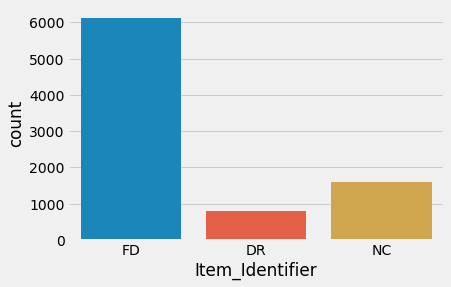

In [214]:
sns.countplot(data['Item_Identifier'])

In [215]:
data.groupby('Item_Identifier').mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
DR,12.072348,0.063099,130.976500,1998.077597,1997.333337
FD,12.832186,0.068332,142.135021,1997.819755,2215.354223
NC,13.354532,0.059222,141.622424,1997.755472,2142.721364


In [216]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

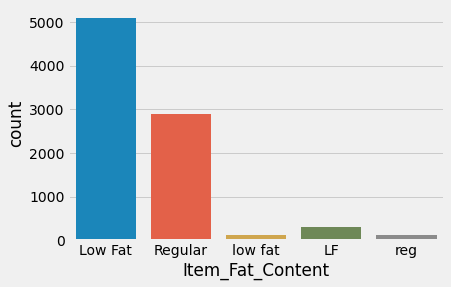

In [217]:
sns.countplot(data['Item_Fat_Content'])

In [218]:
data['Item_Fat_Content'] =  data['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
data['Item_Fat_Content'] =  data['Item_Fat_Content'].replace(['reg'],'Regular')

In [219]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

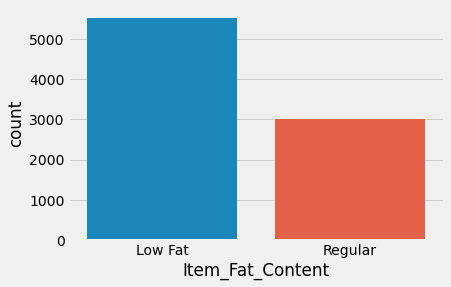

In [220]:
sns.countplot(data['Item_Fat_Content'])

In [221]:
data['Item_Type'].value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

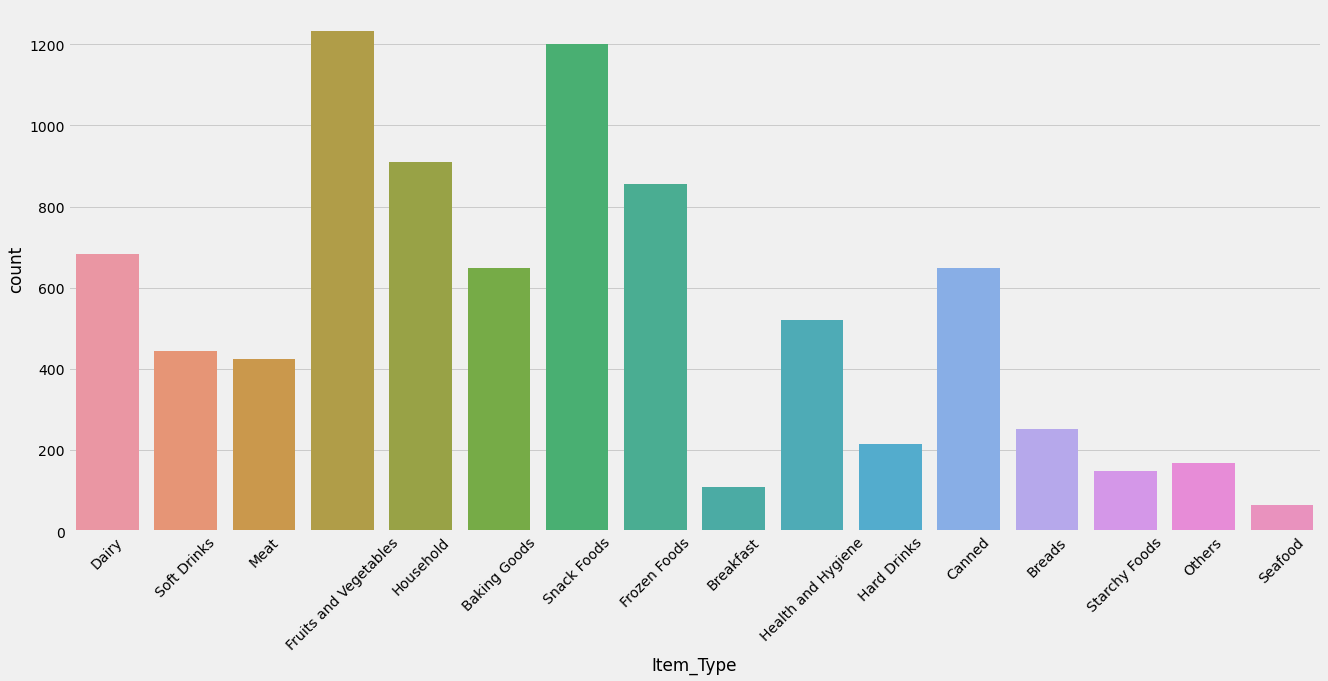

In [222]:
plt.figure(figsize=[20,9])
sns.countplot(data.Item_Type)
plt.xticks(rotation =45);

In [223]:
data['Outlet_Identifier'].value_counts()


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [224]:
data['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [225]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [226]:
data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

# preprocessing

In [227]:
# lets Impute the Missing Values
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

# lets Check the Missing Values again
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## outlier detection

In [228]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:xlabel='Item_MRP'>

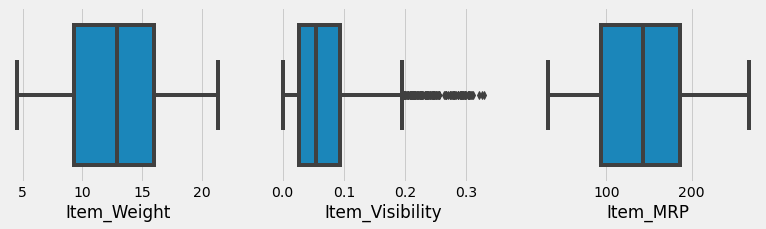

In [229]:
plt.figure(figsize=(12,3))
plt.style.use('fivethirtyeight')

plt.subplot(1,3,1)
sns.boxplot(data['Item_Weight'])


plt.subplot(1,3,2)
sns.boxplot(data['Item_Visibility'])


plt.subplot(1,3,3)
sns.boxplot(data['Item_MRP'])


In [230]:
data['Item_Visibility'].describe().T

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

<AxesSubplot:xlabel='Item_Visibility'>

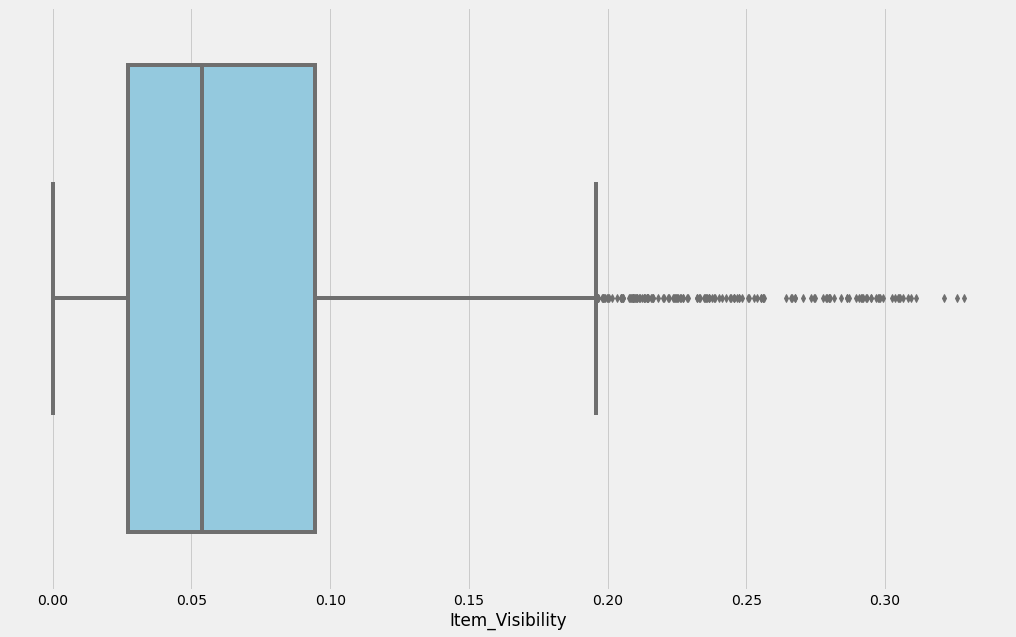

In [231]:
plt.figure(figsize=(16,10))
sns.boxplot(data['Item_Visibility'],color = 'skyblue')

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

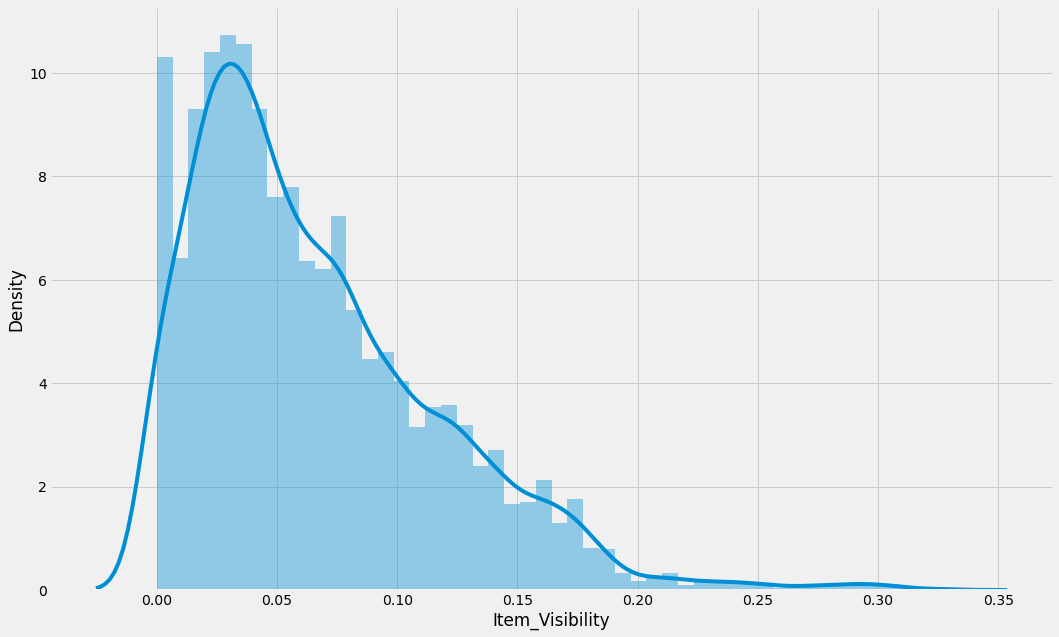

In [232]:
plt.figure(figsize=(16,10))
sns.distplot(data['Item_Visibility'])

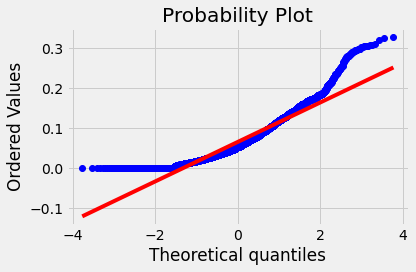

In [233]:
stats.probplot(data['Item_Visibility'], plot=plt)
plt.tight_layout()

In [234]:
L = data['Item_Visibility'].mean() - 3*data['Item_Visibility'].std()
U = data['Item_Visibility'].mean() + 3*data['Item_Visibility'].std()
df_out = data[(data['Item_Visibility']>U) | (data['Item_Visibility']<L)]
df_out

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,FD,12.857645,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
83,NC,12.857645,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
108,DR,12.857645,Low Fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
174,FD,17.700000,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Medium,Tier 3,Grocery Store,345.5502
434,FD,12.857645,Regular,0.264125,Meat,155.7314,OUT019,1985,Small,Tier 1,Grocery Store,155.1314
...,...,...,...,...,...,...,...,...,...,...,...,...
8194,FD,12.857645,Regular,0.299098,Dairy,157.8630,OUT019,1985,Small,Tier 1,Grocery Store,469.3890
8215,FD,12.857645,Regular,0.279887,Frozen Foods,193.1478,OUT019,1985,Small,Tier 1,Grocery Store,387.4956
8273,FD,12.857645,Low Fat,0.297313,Canned,185.4266,OUT019,1985,Small,Tier 1,Grocery Store,368.8532
8345,FD,12.857645,Regular,0.266397,Frozen Foods,215.6218,OUT019,1985,Small,Tier 1,Grocery Store,641.1654


In [235]:
#data['Item_Visibility'] = np.where(data['Item_Visibility'] < 0.25,data['Item_Visibility'],data['Item_Visibility'].mean())

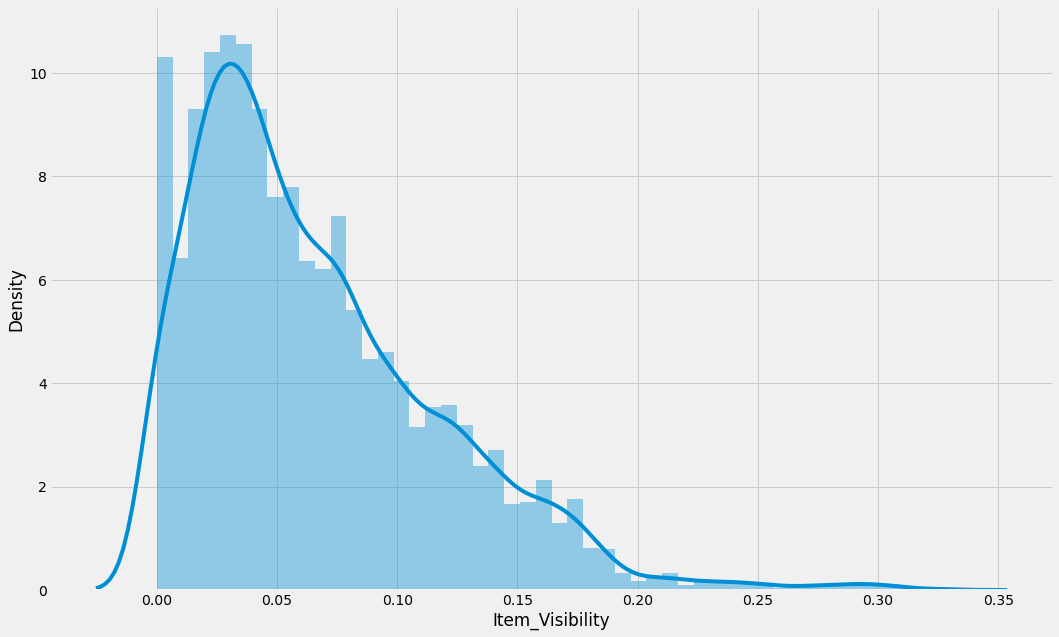

In [236]:
plt.figure(figsize=(16,10))
sns.distplot(data['Item_Visibility']);

# Feature engineering

In [237]:
#Data we have is from 2013, so we will create a new feature calculating the age of outlets.
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

In [238]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable',                                                            
              'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [239]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined'] == 
"Non-Consumable", "Item_Fat_Content"] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

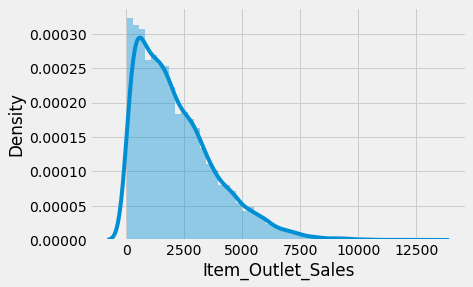

In [240]:
sns.distplot(data['Item_Outlet_Sales'])

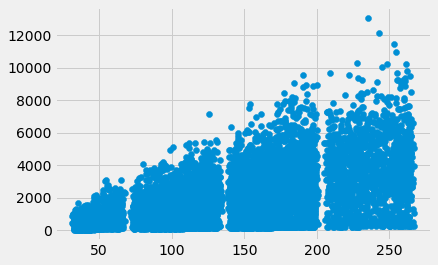

In [241]:
plt.scatter(data.Item_MRP,data.Item_Outlet_Sales)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

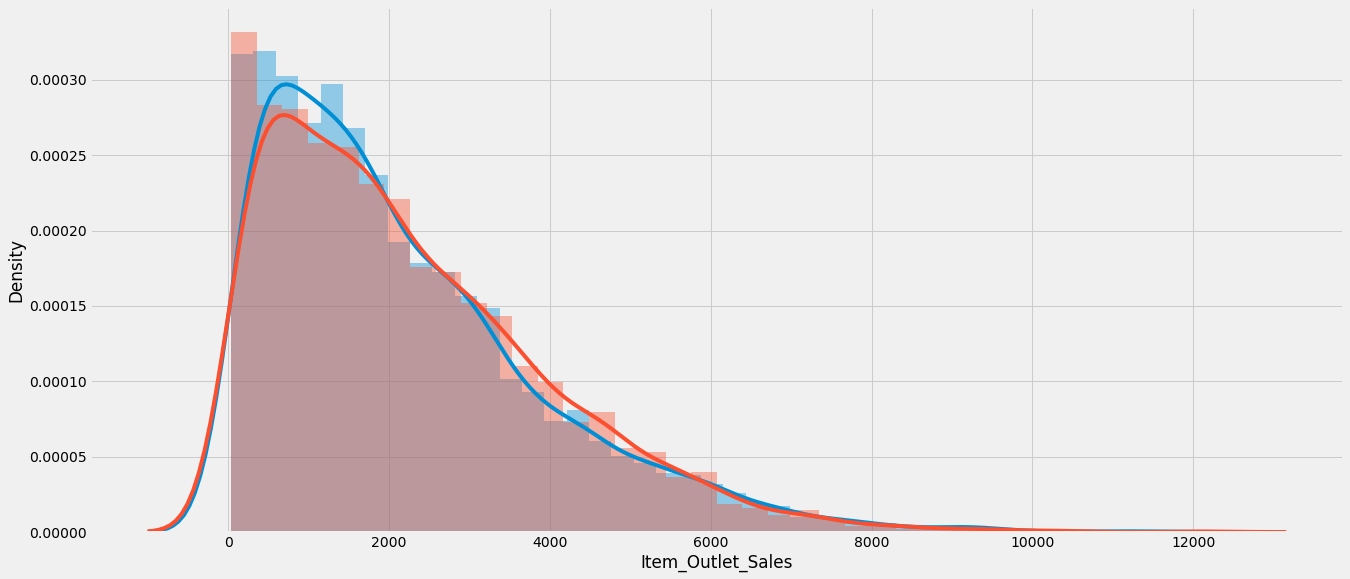

In [242]:
plt.figure(figsize=[20,9])
sns.distplot(data[data.Item_Fat_Content=='Low Fat']['Item_Outlet_Sales'])
sns.distplot(data[data.Item_Fat_Content=='Regular']['Item_Outlet_Sales'])

In [243]:
pd.pivot_table(data,'Item_Outlet_Sales',index='Item_Type',columns='Outlet_Size')

Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,2050.901134,2044.572273,1724.681911
Breads,2080.731528,2244.802689,2158.795546
Breakfast,2104.286508,2290.501060,1715.988533
Canned,2211.265203,2316.837355,2038.457667
Dairy,2453.181713,2351.587472,1900.495836
Frozen Foods,2214.096189,2233.128106,1895.489818
Fruits and Vegetables,2405.118103,2421.365188,1931.258454
Hard Drinks,2363.590000,2178.049011,1926.518932
Health and Hygiene,1953.042439,2054.796907,1929.155500


## Item_Number_Sales

### Given that the Item_MRP does not change significantly accross the stores, it might be more useful to analyse the number of items sold,not the Item_Outlet_Sales. The Item_Outlet_Sales is the number of items sold times the Item_MRP. So let's make a new variable with the number of items sold (by dividing the Item_Outlet_Sales by Item_MRP).




In [244]:
data['Item_Number_Sales'] = data['Item_Outlet_Sales']/data['Item_MRP']

## Item_outlet_sales and Item_MRP vs Item_Visibility

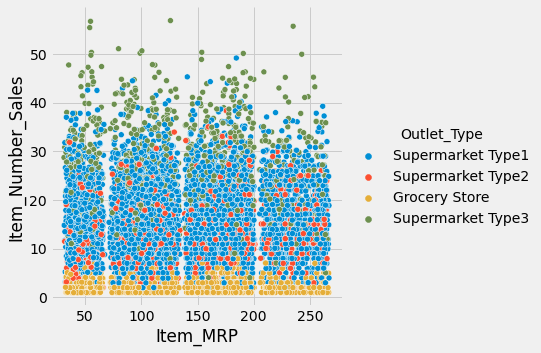

In [245]:
sns.pairplot(data=data, x_vars='Item_MRP', y_vars='Item_Number_Sales', hue='Outlet_Type', size=5)


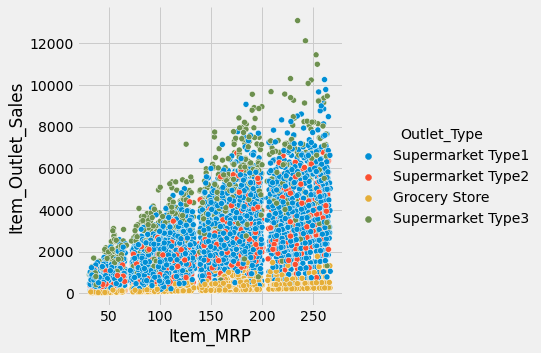

In [246]:
sns.pairplot(data=data, x_vars='Item_MRP', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)


In [247]:
cor1 = data['Item_MRP'].corr(data['Item_Outlet_Sales'])
cor2 = data['Item_MRP'].corr(data['Item_Number_Sales'])
print('Correlation between Item_MRP and Item_Outlet_Sales: {}'.format(cor1))
print('Correlation between Item_MRP and Item_Number_Sales: {}'.format(cor2))

Correlation between Item_MRP and Item_Outlet_Sales: 0.5675744466569194
Correlation between Item_MRP and Item_Number_Sales: 0.011143527012324834


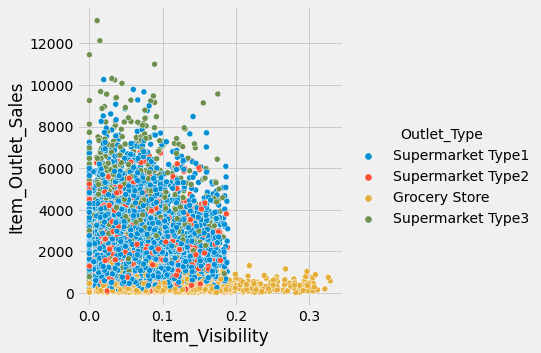

In [248]:
sns.pairplot(data=data, x_vars='Item_Visibility', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)


## Numerical and One-Hot Coding of Categorical Variables

In [249]:
# drop the Outlet_Establishment_Year and Item_Number_Sales columns from the data
data = data.drop(['Outlet_Establishment_Year','Item_Number_Sales'], axis=1)
data.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Outlet_Years              int64
Item_Type_Combined       object
dtype: object

<AxesSubplot:>

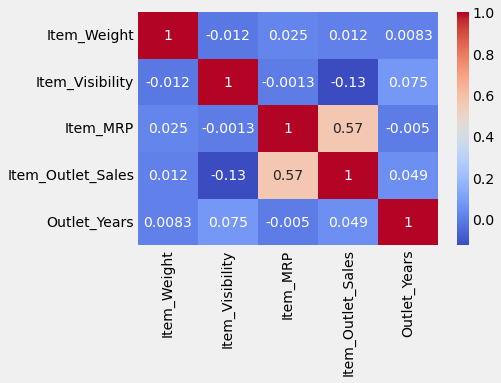

In [250]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [251]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [252]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined,Outlet
0,FD,9.30,0,0.016047,Dairy,249.8092,OUT049,1,0,1,3735.1380,14,1,9
1,DR,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,1,2,2,443.4228,4,0,3
2,FD,17.50,0,0.016760,Meat,141.6180,OUT049,1,0,1,2097.2700,14,1,9
3,FD,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1,2,0,732.3800,15,1,0
4,NC,8.93,1,0.000000,Household,53.8614,OUT013,0,2,1,994.7052,26,2,1


In [253]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type', 'Item_Type','Outlet_Identifier','Item_Identifier',
                              'Item_Type_Combined','Outlet'])

In [254]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,3735.1380,14,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,4,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,14,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,732.3800,15,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,26,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [255]:
data.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Item_Outlet_Sales                  float64
Outlet_Years                         int64
Item_Fat_Content_0                   uint8
Item_Fat_Content_1                   uint8
Item_Fat_Content_2                   uint8
Outlet_Location_Type_0               uint8
Outlet_Location_Type_1               uint8
Outlet_Location_Type_2               uint8
Outlet_Size_0                        uint8
Outlet_Size_1                        uint8
Outlet_Size_2                        uint8
Outlet_Type_0                        uint8
Outlet_Type_1                        uint8
Outlet_Type_2                        uint8
Outlet_Type_3                        uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_F

# Standardisation of numerical data


from sklearn import preprocessing
X = data[['Item_Visibility', 'Item_Weight', 'Outlet_Years']]
standardized_X = preprocessing.scale(X.values, with_mean=True)
data[['Item_Visibility', 'Item_Weight', 'Outlet_Years']] = standardized_X


In [256]:
data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914,15.168133,0.459697,0.187610,0.352693,0.280183,0.326763,...,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117
std,4.226124,0.051598,62.275067,1706.499616,8.371760,0.498402,0.390423,0.477836,0.449115,0.469057,...,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804
min,4.555000,0.000000,31.290000,33.290000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,93.826500,834.247400,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.053931,143.012800,1794.331000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,0.094585,185.643700,3101.296400,26.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,13086.964800,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [257]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(data)

array([[-0.84187169, -0.97073217,  1.74745381, ..., -0.34976195,
        -0.34997319,  2.85736174],
       [-1.64170589, -0.90811123, -1.48902325, ..., -0.34976195,
        -0.34997319, -0.34997319],
       [ 1.09855449, -0.95691733,  0.01004021, ..., -0.34976195,
        -0.34997319,  2.85736174],
       ...,
       [-0.53424315, -0.59978449, -0.89720755, ..., -0.34976195,
        -0.34997319, -0.34997319],
       [-1.33644372,  1.53287976, -0.60797692, ..., -0.34976195,
        -0.34997319, -0.34997319],
       [ 0.45963367, -0.41193591, -1.05226104, ..., -0.34976195,
         2.85736174, -0.34997319]])

# Separate train and test datasets

In [258]:
x = data.drop('Item_Outlet_Sales',axis = 1)
y = np.log1p(data['Item_Outlet_Sales'])

In [259]:
from sklearn.model_selection import train_test_split

xtrain, xtest,ytrain ,ytest = train_test_split(x,y,test_size=.20)

# Creating model

In [260]:
model_rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=22, verbose=0, warm_start=False)

model_rf.fit(xtrain, ytrain)
pred_Rand = model_rf.predict(xtest)
print(mean_squared_error(ytest, pred_Rand, squared=False))
print(mean_absolute_error(ytest, pred_Rand))
print(r2_score(ytest, pred_Rand))

0.535114818586393
0.4195185869505904
0.7254091907112599


In [261]:
xgb_params = {'objective': 'reg:squarederror',
              'n_estimators': 10000,
              'learning_rate': 0.036,
              'subsample': 0.926,
              'colsample_bytree': 0.118,
              'grow_policy':'lossguide',
              'max_depth': 3,
              'booster': 'gbtree', 
              'reg_lambda': 45.1,
              'reg_alpha': 34.9,
              'random_state': 42,
              'reg_lambda': 0.00087,
              'reg_alpha': 23.132}

model_XGB = XGBRegressor(**xgb_params)
model_XGB.fit(xtrain, ytrain) 
pred_XGB = model_XGB.predict(xtest)
print(mean_squared_error(ytest, pred_XGB, squared=False))
print(mean_absolute_error(ytest, pred_XGB))
print(r2_score(ytest, pred_XGB))

0.5068773255153602
0.39395295970193467
0.7536243576105144


In [262]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(xtrain,ytrain)
pred_knn = KNN.predict(xtest)

In [263]:
print(mean_squared_error(ytest, pred_knn, squared=False))
print(mean_absolute_error(ytest, pred_knn))
print(r2_score(ytest, pred_knn))

0.6076507307037964
0.4701830652667808
0.6459210648699902


In [264]:
from sklearn.linear_model import RANSACRegressor,LinearRegression

# Set RANSAC hyperparameters
ransac = RANSACRegressor(LinearRegression(),
max_trials=4, # Number of Iterations
min_samples=2, # Minimum size of the sample
loss='absolute_loss', # Metrics for loss
residual_threshold=10 )# Threshold)

# Train model
ransac.fit(xtrain, ytrain)
pred_ransac = ransac.predict(xtest)

In [265]:
print(mean_squared_error(ytest, pred_ransac, squared=False))
print(mean_absolute_error(ytest, pred_ransac))
print(r2_score(ytest, pred_ransac))

0.5231671605612714
0.4034480896946888
0.737534036558023
